<a href="https://colab.research.google.com/github/amritmth/NSE-Stock-Market-Analysis-Assignment/blob/main/NSA_Stock_Market_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing And Exploratory Data Analysis
Loading And Cleaning the Dataset

In [ ]:
df=pd.read_csv(r"C:\PGA32\Internship_Vitual\nse_all_stock_data.csv")
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8470 entries, 0 to 8469
Columns: 1418 entries, Date to PRITIKAUTO
dtypes: float64(1417), object(1)
memory usage: 91.6+ MB


In [ ]:
df.shape

(8470, 1418)

In [ ]:
# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handling Missing Values Treatment

In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.interpolate(method='linear').ffill().bfill()
df.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1417, dtype: int64

In [ ]:
# Resample the data to monthly frequency and calculate the mean for each month
monthly_mean = df.resample('M').mean()

print(monthly_mean)

               RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
Date                                                                          
1991-01-31    14.691803    39.700001     2.980000    25.127272    15.681876   
1991-02-28    14.691803    39.700001     2.980000    25.127272    15.681876   
1991-03-31    14.691803    39.700001     2.980000    25.127272    15.681876   
1991-04-30    14.691803    39.700001     2.980000    25.127272    15.681876   
1991-05-31    14.691803    39.700001     2.980000    25.127272    15.681876   
...                 ...          ...          ...          ...          ...   
2024-03-31  2926.699992  4046.097236  1443.216668  1085.461100  1200.974996   
2024-04-30  2936.162488  3903.625000  1514.607495  1095.112506  1260.237494   
2024-05-31  2868.885719  3866.428548  1488.973807  1125.804763  1329.669056   
2024-06-30  2940.765792  3826.605250  1614.950009  1143.949996  1410.939479   
2024-07-31  3128.160059  3998.719971  1715.939990  1

In [ ]:
df.head()

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-03,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-04,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-07,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-08,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15


In [ ]:
df_interpolated = df.interpolate(method='linear')
df_interpolated.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1417, dtype: int64

In [ ]:
df.dropna(axis=1, how='all', inplace=True)
df.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1390, dtype: int64

# Performing basic statistical analysis on the stock prices and volumes

In [ ]:
#Random stock prices and volumes
stock_prices = np.random.normal(100, 20, size=(8470, 1390))
stock_volumes = np.random.normal(1000, 200, size=(8470, 1390))

companies = df.columns.tolist()
df_prices = pd.DataFrame(stock_prices, columns=companies)
df_volumes = pd.DataFrame(stock_volumes, columns=companies)

#Calculating stats
stats_prices = df_prices.describe()
stats_volumes = df_volumes.describe()

print("Stock Prices Statistics:")
print(stats_prices)

print("Stock Volumes Statistics:")
print(stats_volumes)

Stock Prices Statistics:
          RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000   
mean     99.784883   100.132192    99.710206    99.376104    99.922172   
std      20.090036    20.131331    20.160921    19.930571    19.979616   
min      21.630499    24.568993    21.110672    26.721636    20.248595   
25%      86.362419    86.744049    86.057533    86.007042    86.343700   
50%     100.120531   100.019081    99.862536    99.196357    99.749583   
75%     113.419755   113.454906   113.318689   112.851438   113.559179   
max     187.962663   180.246149   184.679250   169.761294   169.991608   

              SBIN         INFY         LICI          ITC   HINDUNILVR  ...  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000  ...   
mean    100.179636   100.177288   100.249821   100.018470   100.121229  ...   
std      19.473754    19.884396    19.862972    20.232219    20.223986 

In [ ]:
def numerical(data,var,graph_plot=True):
    min_n=data[var].min()
    max_n=data[var].max()
    var_n=data[var].var()
    std_n=data[var].std()
    p1=data[var].quantile(.01)
    p10=data[var].quantile(.1)
    p25=data[var].quantile(.25)
    p50=data[var].quantile(.5)
    p75=data[var].quantile(.75)
    p90=data[var].quantile(.9)
    p99=data[var].quantile(.99)
    iqr=p75-p25

    if graph_plot==True:
        sns.histplot(data[var])
        plt.show()
        sns.boxplot(y=data[var])
        plt.show()

    results={"min":min_n,"max":max_n,"var":var_n,"std":std_n,
            "p1":p1,"p10":p10,"p25":p25,"p50":p50,"p75":p75,"p90":p90,"p99":p99}
    return results

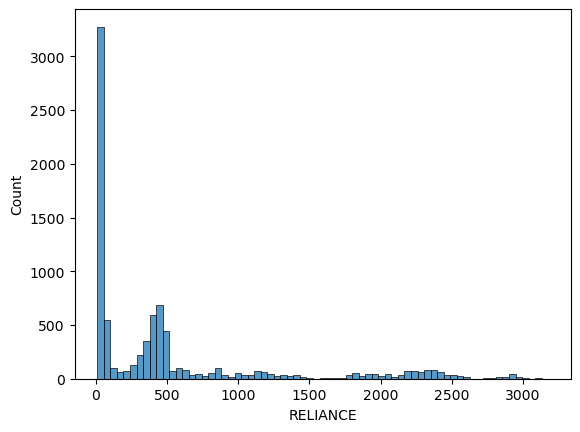

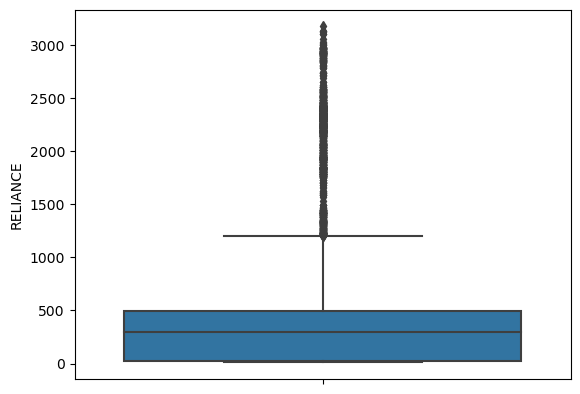

{'min': 10.975115776062012,
 'max': 3177.25,
 'var': 518244.6146590654,
 'std': 719.8920854260487,
 'p1': 14.051611289978027,
 'p10': 14.691802978515623,
 'p25': 25.58480262756348,
 'p50': 298.36390686035156,
 'p75': 497.4484329223633,
 'p90': 1907.9880004882814,
 'p99': 2865.4815673828107}

In [ ]:
numerical(data=df, var="RELIANCE")

# Visualizing the Price Trends of the First 10 stocks.

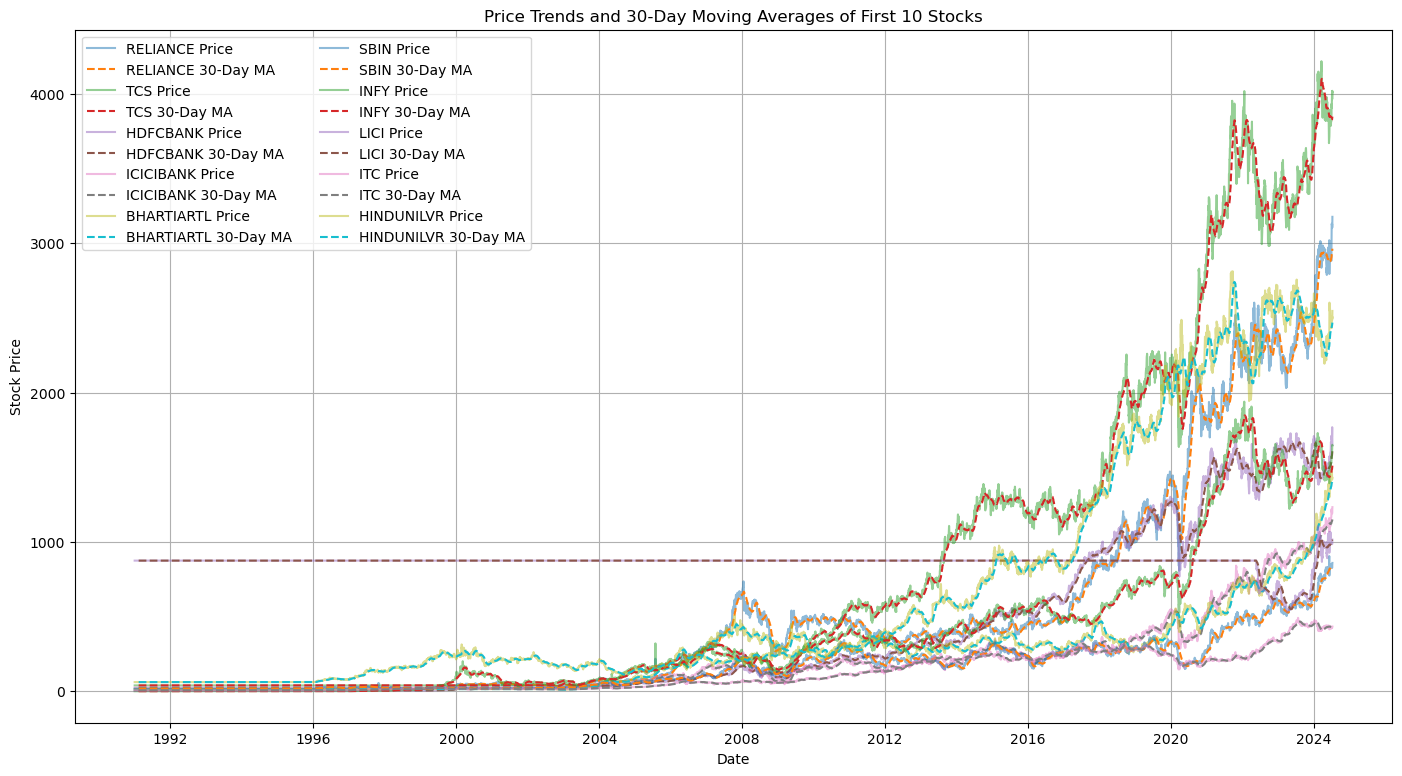

In [ ]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index)

# Select the first 10 stocks
selected_stocks = df.iloc[:, :10]

# Calculate a 30-day moving average for the selected stocks
moving_avg = selected_stocks.rolling(window=30).mean()
plt.figure(figsize=(17, 9))

# Plot each stock's price trend and moving average as line charts
for stock in selected_stocks.columns:
    plt.plot(selected_stocks.index, selected_stocks[stock], label=f'{stock} Price', alpha=0.5)
    plt.plot(moving_avg.index, moving_avg[stock], label=f'{stock} 30-Day MA', linestyle='--')


plt.title('Price Trends and 30-Day Moving Averages of First 10 Stocks')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.show()

# Correlation Analysis

### Creating a correlation matrix of stock returns

In [ ]:
Returns_df = df.pct_change().dropna()
correlation_matrix = Returns_df.corr()
print("CORRELATION MATRIX OF STOCK RETURNS:")
print()
print(correlation_matrix)

CORRELATION MATRIX OF STOCK RETURNS:

            RELIANCE       TCS  HDFCBANK  ICICIBANK  BHARTIARTL      SBIN  \
RELIANCE    1.000000  0.334238  0.312595   0.323234    0.254980  0.378049   
TCS         0.334238  1.000000  0.129333   0.198919    0.165895  0.123870   
HDFCBANK    0.312595  0.129333  1.000000   0.435351    0.246510  0.453661   
ICICIBANK   0.323234  0.198919  0.435351   1.000000    0.358375  0.522027   
BHARTIARTL  0.254980  0.165895  0.246510   0.358375    1.000000  0.278031   
...              ...       ...       ...        ...         ...       ...   
DONEAR      0.092988  0.058163  0.114729   0.172062    0.094604  0.168352   
CAREERP     0.087273  0.026032  0.085209   0.144409    0.074941  0.144654   
INTLCONV    0.028643  0.019194  0.022436   0.016360    0.025578  0.042378   
SHREEPUSHK  0.069248  0.023215  0.076226   0.120126    0.067191  0.130518   
PRITIKAUTO  0.015102  0.015859  0.014597   0.021056    0.023976  0.024963   

                INFY      LICI       

### Identifying the most correlated pairs of stocks

In [ ]:
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)

most_correlated_pairs = correlation_pairs[correlation_pairs < 1].head(10)

print("Most Correlated Pairs of Stocks:")
print(most_correlated_pairs)

Most Correlated Pairs of Stocks:
TRENT       BEL           0.983471
BEL         TRENT         0.983471
VTL         BEL           0.982905
BEL         VTL           0.982905
CESC        BEL           0.981981
BEL         CESC          0.981981
            BAJFINANCE    0.980640
BAJFINANCE  BEL           0.980640
TRENT       VTL           0.974968
VTL         TRENT         0.974968
dtype: float64


### Visualizing the correlations using a heatmap

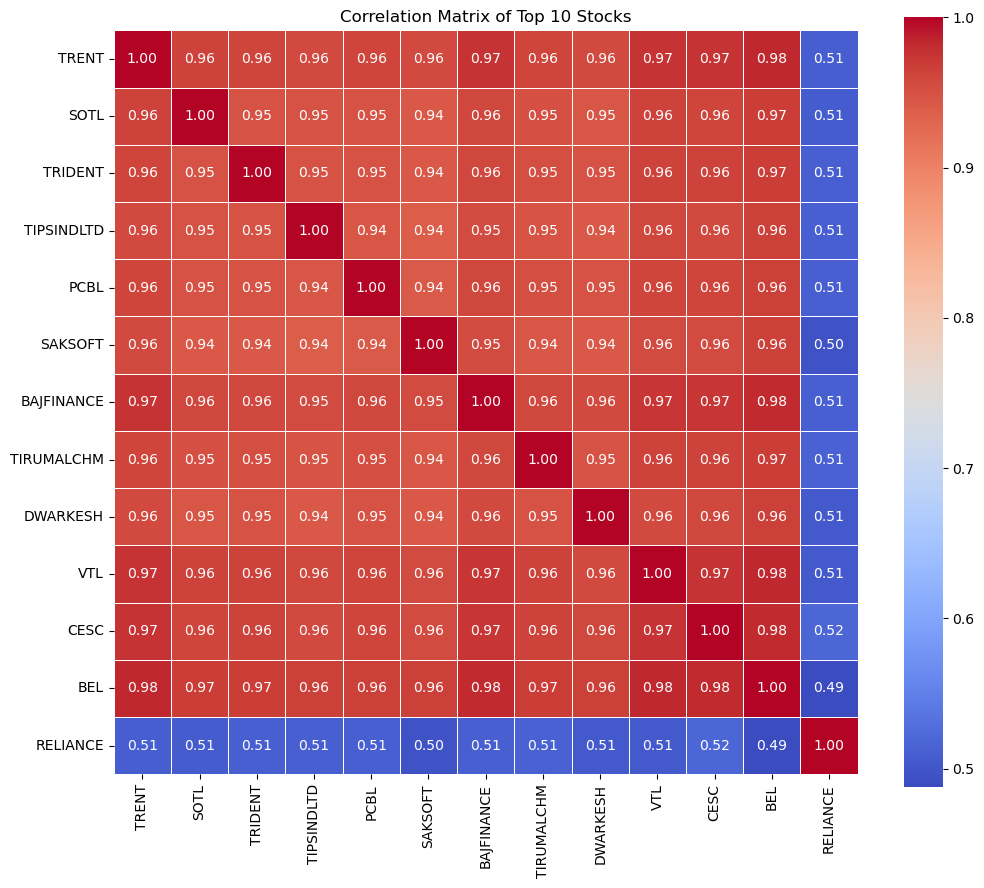

In [ ]:
# Extract top 20 pairs of correlations
top_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20]

# Extract stock names from the index
stocks = list(set([pair[0] for pair in top_corr_pairs.index] + [pair[1] for pair in top_corr_pairs.index]))

# Correlation matrix for the top stocks
top_corr_matrix = correlation_matrix.loc[stocks, stocks]

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.7)
plt.title('Correlation Matrix of Top 10 Stocks')
plt.show()

# Time Series Decomposition

### Choosing one stock and perform time series decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

stock_name = 'TCS'
stock_data = df[stock_name]

# Decompose using STL (Seasonal Trend by Loess) with a additive model
decomposition = seasonal_decompose(stock_data, model='additive', period=4)

### Identifying trend, seasonality, and residual components

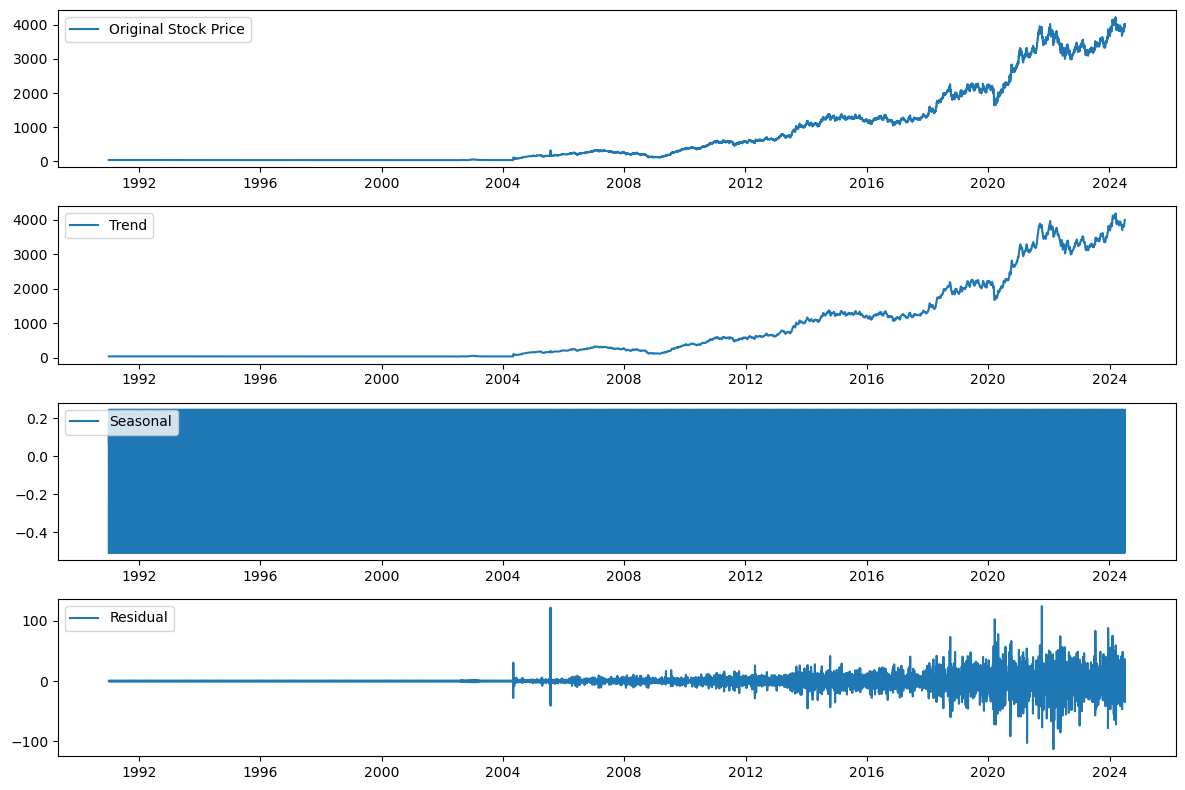

In [ ]:
plt.figure(figsize=(12, 8))

#Plotting the original stock price for TCS
plt.subplot(411)
plt.plot(stock_data, label='Original Stock Price')
plt.legend(loc='upper left')

#Plotting the Trend Components for TCS
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

#Plotting the Seasonal Components for TCS
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

#Plotting the Residual Components for TCS
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Interpreting the results and their implications for trading

INTERPRETATION-

Original Stock Price- Statistics demonstrate a rising trend in stock prices from 2004 to after 2024.

Trend: Stock prices have grown steadily during the investigated time, indicating a consistent rising tendency.

Seasonality: Regular oscillations indicate predictable swings over specified time periods, which may be driven by economic or seasonal variables.

Residuals are random oscillations around a central axis that show abnormalities and unexpected changes in stock prices, presumably caused by random occurrences.

# Anomaly Detection

### DevelopIing a method to detect anomalous price movements

In [ ]:
def detect_anomalies_bb(data, window=20, std_dev_multiplier=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    upper_band = rolling_mean + (std_dev_multiplier * rolling_std)
    lower_band = rolling_mean - (std_dev_multiplier * rolling_std)

    anomalies = pd.DataFrame(index=data.index)
    anomalies['price'] = data
    anomalies['anomaly'] = (data > upper_band) | (data < lower_band)
    anomalies['deviation'] = np.abs(data - rolling_mean)
    return anomalies[anomalies['anomaly']]

stocks = pd.DataFrame({
    'Stock1': np.random.normal(100, 10, 100),
    'Stock2': np.random.normal(50, 5, 100),
    'Stock3': np.random.normal(75, 7, 100)
})

anomalies_by_stock = {}
for col in stocks.columns:
    anomalies_by_stock[col] = detect_anomalies_bb(stocks[col])

# Finding the top 5 most significant anomalies across all stocks
all_anomalies = pd.concat(anomalies_by_stock.values())
top_5_anomalies = all_anomalies.nlargest(5, 'deviation')
print("Top 5 Anomalies:")
print(top_5_anomalies)

Top 5 Anomalies:
        price  anomaly  deviation
93  77.123601     True  23.160418
64  96.401270     True  21.059984
91  80.941628     True  20.788521
83  62.681209     True  14.550307
50  87.252735     True  13.691765


In [ ]:
def detect_anomalies_zscore(df, threshold_factor=3):
    anomalies = pd.DataFrame()
    anomaly_summary = {}

    for column in df.columns:
        # Calculate Z-scores
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std

        # Define anomaly threshold
        anomaly_threshold = threshold_factor

        # Detect anomalies (absolute Z-score > threshold)
        column_anomalies = df[column][abs(z_scores) > anomaly_threshold]

        # Add to anomalies DataFrame
        anomalies = pd.concat([anomalies, column_anomalies], axis=1)

        # Summarize anomalies for each stock
        anomaly_summary[column] = {
            'Anomaly Count': len(column_anomalies),
            'Anomaly Values': column_anomalies.tolist(),
            'Mean': mean,
            'Standard Deviation': std,
            'Threshold': anomaly_threshold
        }

    return anomalies, anomaly_summary

# Detect anomalies using Z-scores
anomalies, anomaly_summary = detect_anomalies_zscore(Returns_df, threshold_factor=3)

# Print anomaly summary
print("Anomalies Detected:")
print(anomalies)
print("\nAnomaly Summary:")

Anomalies Detected:
            RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL      SBIN  INFY  \
1996-01-30  0.089867  NaN       NaN        NaN         NaN       NaN   NaN   
1996-02-02  0.108512  NaN       NaN        NaN         NaN  0.069058   NaN   
1996-02-05  0.083170  NaN       NaN        NaN         NaN       NaN   NaN   
1996-02-06 -0.083805  NaN       NaN        NaN         NaN       NaN   NaN   
1996-02-08  0.087379  NaN  0.062827        NaN         NaN       NaN   NaN   
...              ...  ...       ...        ...         ...       ...   ...   
2004-01-26       NaN  NaN       NaN        NaN         NaN       NaN   NaN   
2004-03-02       NaN  NaN       NaN        NaN         NaN       NaN   NaN   
2004-07-13       NaN  NaN       NaN        NaN         NaN       NaN   NaN   
2010-02-06       NaN  NaN       NaN        NaN         NaN       NaN   NaN   
2010-02-08       NaN  NaN       NaN        NaN         NaN       NaN   NaN   

            LICI       ITC  HINDUNILVR  ...

### Identifying and listing Top 5 most significant anomalies in the dataset

In [ ]:
#Identify top 5 anomalies
anomalies_count = {stock: summary['Anomaly Count'] for stock, summary in anomaly_summary.items()}
sorted_anomalies = sorted(anomalies_count.items(), key=lambda item: item[1], reverse=True)[:5]

#Print the top 5 anomalies
print("\nTop 5 Most Significant Anomalies:")
for stock, count in sorted_anomalies:
    print(f"{stock}: {count} anomalies")


Top 5 Most Significant Anomalies:
JITFINFRA: 495 anomalies
FOCUS: 442 anomalies
FCSSOFT: 402 anomalies
E2E: 398 anomalies
BALAXI: 398 anomalies


### Investigate and explain possible reasons for these anomalies

Factors include earnings reports, mergers and acquisitions, regulatory pronouncements, and so on.

Changes in Market Sentiment: investor expectations, general market trends, geopolitical events, variations in economic data, and so on.

Specific stock influences include news about individual firms such as product releases, leadership changes, legal issues, and so on.

Financial performance updates are quarterly or yearly financial results that can have a significant impact on stock prices.

Business decisions include mergers, stock divisions, takeovers, and so forth.

# Thank you very much for giving me this assignment.